In [1]:
def Block_map(json_data):
    blocks1 =[]
    blocks =[]
    for x in range(len(json_data)):
        blocks = blocks + json_data[x]['Blocks']
#     blocks =json_data['Blocks']
    words_block_map = {}
    selection_element_block_map = {}
    key_value_block_map ={}
    for block in blocks:
        if block['BlockType'] == "WORD":
            block_id = block['Id']
            words_block_map[block_id] = block
        if block['BlockType'] == "SELECTION_ELEMENT":
            block_id = block['Id']
            selection_element_block_map[block_id] = block
        if block['BlockType'] == "KEY_VALUE_SET":
            block_id = block['Id']
            key_value_block_map[block_id] = block
    return words_block_map  , selection_element_block_map,  key_value_block_map

In [2]:
def json_parser(response):
    json_data=response
    words_block_map  , selection_element_block_map,  key_value_block_map = Block_map(json_data)
    file_level_info = []
    page_count = 1
    doc = Document(json_data)
    for page in doc.pages:

        dic={}
        printed = []
        handwritten = []
        dic['PAGE_NO'] = page_count
        for line in page.lines:
            for word in line.words:
                
                word_dic ={}
                if words_block_map[word.id]['TextType'] == 'PRINTED':
                    word_dic['word'] = word.text
#                     print(word.text)
                    word_dic['confidence'] = word.confidence


                    word_dic['coordinates'] ={'height':word.geometry.boundingBox.height,'width':word.geometry.boundingBox.width,
                                              'top':word.geometry.boundingBox.top,'left':word.geometry.boundingBox.left}
                    printed.append(word_dic)
                else:
                    word_dic['word'] = word.text
#                     print(word.text)
                    word_dic['confidence'] = word.confidence
                    word_dic['coordinates'] ={'height':word.geometry.boundingBox.height,'width':word.geometry.boundingBox.width,
                              'top':word.geometry.boundingBox.top,'left':word.geometry.boundingBox.left}


        dic['PRINTED'] = printed
        dic['HANDWRITTEN'] = handwritten
        page_count+=1
        file_level_info.append(dic)
    return file_level_info

In [3]:
import json
import pandas as pd
from trp import Document
from pprint import pprint

In [4]:
import json
# with open(r"C:\Users\somiya155019\Desktop\PoCs\CUNA_mutual\EXL Sample Transmission 2021-10-15\textract_output\ADD2018_NC_Contrib\NBAPPS_Import_431325_20211004-083734-20.tiff-analysis\response.json") as file:
#     data=json.load(file)
with open(r"C:\Users\mohd166587\Desktop\textract0p\textract_output\ADD2018_NC_Contrib\NBAPPS_Import_431325_20211004-083734-20.tiff-analysis\response.json") as file:
    data=json.load(file)

In [5]:
words_block_map  , selection_element_block_map,  key_value_block_map = Block_map(data)

In [6]:
data


[{'DocumentMetadata': {'Pages': 1},
  'JobStatus': 'SUCCEEDED',
  'Blocks': [{'BlockType': 'PAGE',
    'Geometry': {'BoundingBox': {'Width': 0.9997851252555847,
      'Height': 1.0,
      'Left': 0.0,
      'Top': 0.0},
     'Polygon': [{'X': 0.0, 'Y': 0.0},
      {'X': 0.9997851252555847, 'Y': 9.499177380180949e-17},
      {'X': 0.9997851252555847, 'Y': 1.0},
      {'X': 0.0, 'Y': 1.0}]},
    'Id': '508bbfdb-6389-4fda-a395-2c2448bb6db3',
    'Relationships': [{'Type': 'CHILD',
      'Ids': ['39d294f0-e510-4a99-bef4-28524f4750a5',
       '35e70545-630c-4a2b-b9d6-47b6d1edb5f0',
       'df240cf9-d29d-4ff3-b541-11d884d6be92',
       '79585eb6-1e85-4381-bb3e-39a91b780cb2',
       'f5ff41cb-d4ee-453d-afb4-6ea4b22c48b5',
       '08a08868-e570-4a64-8528-975fa2acf46b',
       '3952b011-0afc-4f38-b021-13f867e058d6',
       'fc498e22-4499-40d8-8cd0-140e21e5d1af',
       '4463a2ca-503e-47b3-adc6-705fdb4a733d',
       '1ca63caa-37a4-43b8-84d2-42b1db08ea0f',
       '8fecd4cf-d8da-4035-a22b-9aaf212e

In [7]:
doc = Document(data)

In [8]:
import cv2
image1 = cv2.imread(r'C:\Users\mohd166587\Desktop\textract0p\textract_output\ADD2018_NC_Contrib\NBAPPS_Import_431325_20211004-083734-20.tiff')
#image1 = cv2.imread(r'C:\Users\mohd166587\Desktop\textract0p\textract_output\ADD2018_NC_Contrib\NB Apps - 20211004-150300-84.tiff')

In [9]:
image2 = image1.copy()

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
d=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 12313, 234353,4545454,4444444444444444444]
#d= [i  for i in range(12,23)]
f=[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 12313, 234353,4545454,4444444444444444444]
momentum_distance_from_center =1000
coll =[]
for item in d:
    for itm  in f:
        if itm == item:
            #print("lol")
            #print(itm)
            #print(item)
            if itm  > momentum_distance_from_center:
                momentum_distance_from_center1 = itm
                coll.append(momentum_distance_from_center1)
                
                
            

In [46]:
coll


[12313, 234353, 4545454, 4444444444444444444]

In [47]:
s= "".join([str(file)  for file in coll])
s[:5]+"-"+s[5:11]+"-"+s[11:18]+"-"+s[18:37]



'12313-234353-4545454-4444444444444444444'

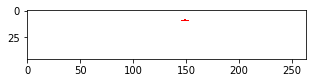

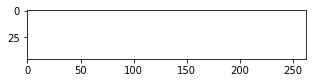

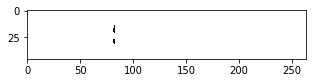

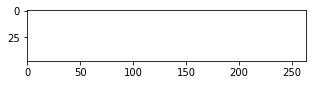

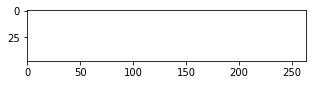

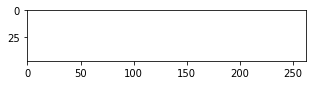

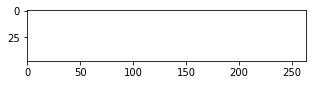

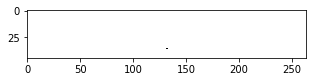

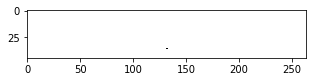

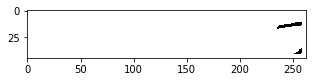

{'amount': '$7.50', 'moment_distance_from_center': 16.76305461424021, 'columnIndex': 3}


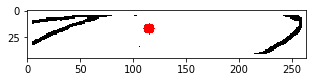

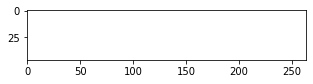

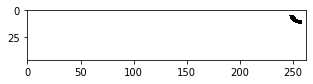

{'amount': '$30.00', 'moment_distance_from_center': 52.952809179494906, 'columnIndex': 3}


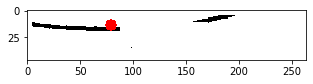

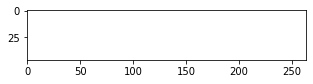

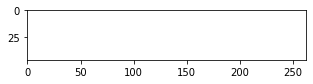

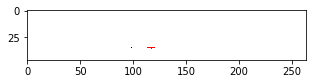

In [19]:
h_img,w_img,c_img = image1.shape
potential_amounts = []
for page in doc.pages:
    for table in page.tables:
#         print(dir(table))
        table_bb = table.geometry
        for row in table.rows:
            for cell in row.cells:
                if cell.rowIndex>2:
                    for id_ in cell.block['Relationships'][0]['Ids']:
                        word_bb = words_block_map[id_]['Geometry']['BoundingBox']
                        #print((word_bb['Left'],word_bb['Top']),(word_bb['Left']+word_bb['Width'],word_bb['Top']+word_bb['Height']))
                        x1 = int(word_bb['Left']*w_img)
                        x2 = int((word_bb['Left']+word_bb['Width'])*w_img)
                        y1 = int(word_bb['Top']*h_img)
                        y2 = int((word_bb['Top']+word_bb['Height'])*h_img)
                        if len(words_block_map[id_]['Text'])>1 or words_block_map[id_]['Text']=='$':
                            cv2.rectangle(image1,(x1,y1),(x2,y2),(255,255,255),-1)
        for row in table.rows:
#             print(dir(row))
            for cell in row.cells:
                if cell.rowIndex>2:
                    cell_bb = cell.geometry.boundingBox
                    x1_cell = int(cell_bb.left*w_img)
                    x2_cell = int((cell_bb.left+cell_bb.width)*w_img)
                    y1_cell = int(cell_bb.top*h_img)
                    y2_cell = int((cell_bb.top+cell_bb.height)*h_img)
                    for id_ in cell.block['Relationships'][0]['Ids']:
                        word_bb = words_block_map[id_]['Geometry']['BoundingBox']
                        crop_img = image1[y1_cell:y2_cell, x1_cell:x2_cell]
                        crop_img_blank = crop_img*0
                        h_crop_img,w_crop_img,c_crop_img = crop_img.shape
                        cv2.rectangle(image1,(x1_cell,y1_cell),(x2_cell,y2_cell),(255,255,255),7)
                        img_grey = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
                        thresh = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
                        cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
                        contour_area = 0
                        for c in cnts:
#                             x,y,w,h = cv2.boundingRect(c)
                            contour_area = contour_area + cv2.contourArea(c)
#                             print(contour_area)
                        if contour_area > 100:
                            cv2.rectangle(crop_img_blank,(x1_cell,y1_cell),(x2_cell,y2_cell),(255,255,255),1)
                            img_grey = cv2.cvtColor(crop_img_blank, cv2.COLOR_BGR2GRAY)
                            thresh_blank = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
                            M_blank = cv2.moments(thresh_blank)
                            cX_blank = int(M_blank["m10"] / M_blank["m00"])
                            cY_blank = int(M_blank["m01"] / M_blank["m00"])
                            M = cv2.moments(thresh)
                            cX = int(M["m10"] / M["m00"])
                            cY = int(M["m01"] / M["m00"])
                            cv2.circle(crop_img, (cX, cY), 5, (255, 0, 0), -1)
                            if (cX > 0.25*w_crop_img and cX < 0.75*w_crop_img) and (cY > 0.25*h_crop_img and cY < 0.75*h_crop_img):
                                cell_info={}
                                cell_info['amount'] = words_block_map[id_]['Text']
                                cell_info['moment_distance_from_center'] = np.sqrt(abs(cX_blank-cX)**2 + abs(cY_blank-cY)**2)
                                cell_info['columnIndex'] = cell.columnIndex
                                print(cell_info)
                        plt.figure(figsize=(5,5))
                        plt.imshow(crop_img)
                        plt.show()

#                         print(words_block_map[id_])
             
                    
                

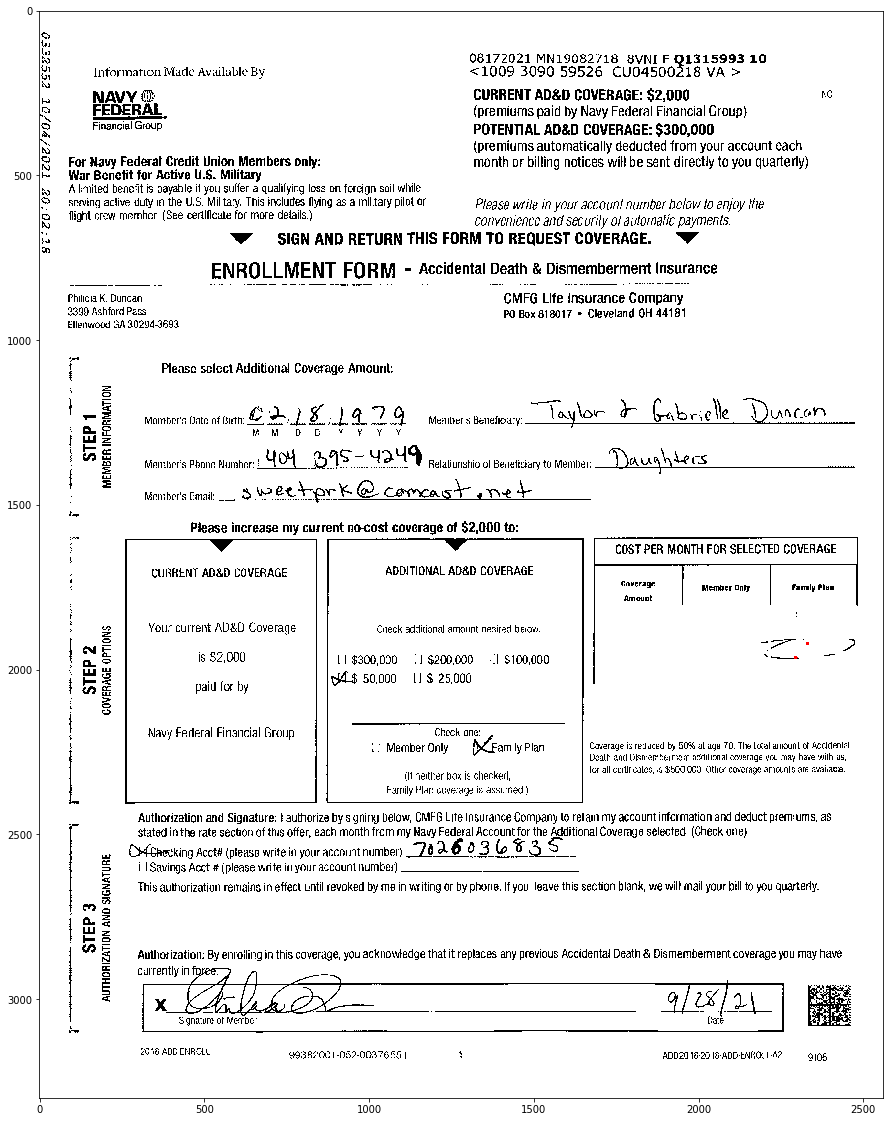

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(image1)
plt.show()

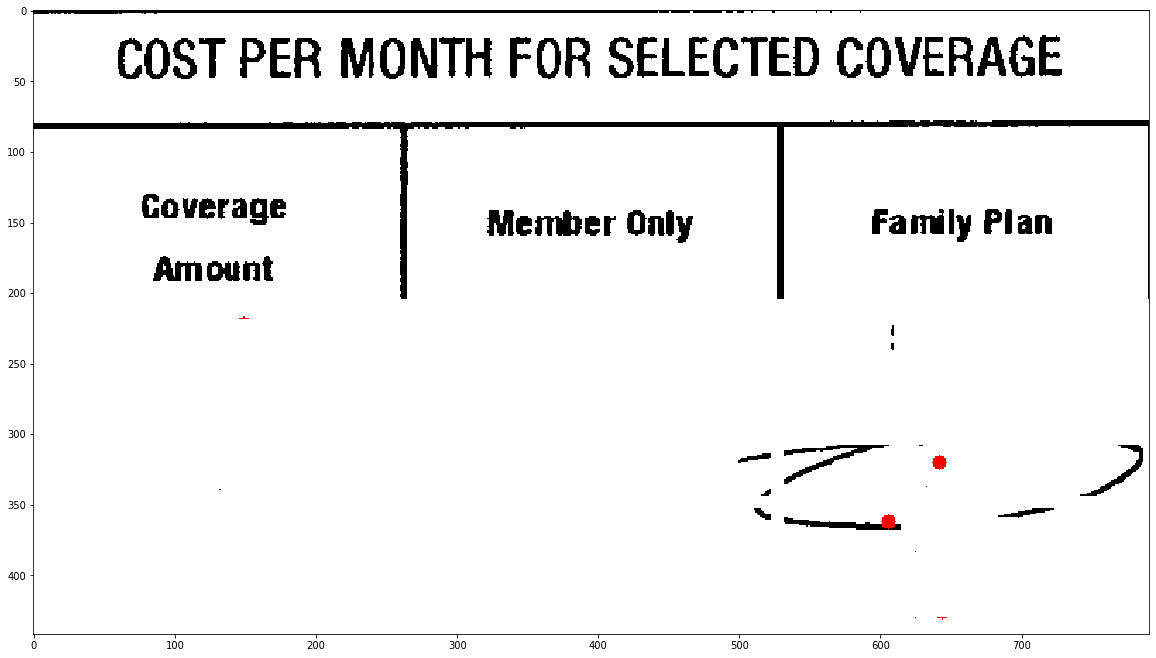

In [18]:
#print(dir(table.geometry.boundingBox))
table_bbox= table.geometry.boundingBox
x1 = int(table_bbox.left*w_img)
x2 = int((table_bbox.left+table_bbox.width)*w_img)
y1 = int(table_bbox.top*h_img)
y2 = int((table_bbox.top+table_bbox.height)*h_img)
#cv2.rectangle(image1,(x1,y1),(x2,y2),(255,0,0),5)
crop_img = image1[y1:y2, x1:x2]

plt.figure(figsize=(20,20))
plt.imshow(crop_img)
plt.show()
#cv2.imwrite('cropped_Test2.jpg',crop_img)

In [57]:
import json
with open(r"C:\Users\mohd166587\Desktop\textract0p\textract_output\ADD2018_NC_Contrib\NB Apps - 20211004-150300-84.tiff-analysis\response.json") as file:
    data1=json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mohd166587\\Desktop\\textract0p\\textract_output\\ADD2018_NC_Contrib\\NB Apps - 20211004-150300-84.tiff-analysis\\response.json'

In [20]:
words_block_map  , selection_element_block_map,  key_value_block_map = Block_map(data1)

In [21]:
doc2 = Document(data1)

In [22]:
import cv2
image3 = cv2.imread(r'C:\Users\mohd166587\Desktop\textract0p\textract_output\ADD2018_NC_Contrib\NB Apps - 20211004-150300-84.tiff')

In [23]:
h_img,w_img,c_img = image3.shape
for page in doc2.pages:
    for table in page.tables:
        #print(dir(table.geometry.boundingBox))
        table_bb2 = table.geometry

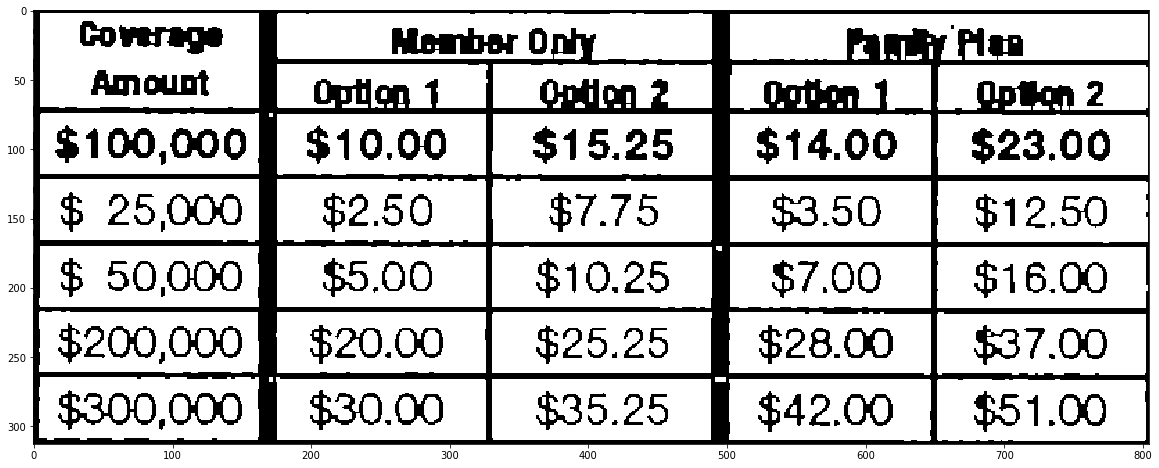

In [24]:
#print(dir(table.geometry.boundingBox))
table_bbox= table_bb2.boundingBox
x1 = int(table_bbox.left*w_img)
x2 = int((table_bbox.left+table_bbox.width)*w_img)
y1 = int(table_bbox.top*h_img)
y2 = int((table_bbox.top+table_bbox.height)*h_img)
#cv2.rectangle(image1,(x1,y1),(x2,y2),(255,0,0),5)
crop_img2 = image3[y1:y2, x1:x2]

plt.figure(figsize=(20,20))
plt.imshow(crop_img2)
plt.show()

In [25]:
h_img,w_img,c_img = image3.shape
for page in doc2.pages:
    for table in page.tables:
        #print(dir(table.geometry.boundingBox))
        table_bb = table.geometry
        for row in table.rows:
            for cell in row.cells:
#                 if cell.rowIndex>2:
#                     cell_bb = cell.geometry
                #print(cell.block)
                try:
                    for id_ in cell.block['Relationships'][0]['Ids']:
                        word_bb = words_block_map[id_]['Geometry']['BoundingBox']
                        #print((word_bb['Left'],word_bb['Top']),(word_bb['Left']+word_bb['Width'],word_bb['Top']+word_bb['Height']))
                        x1 = int(word_bb['Left']*w_img)
                        x2 = int((word_bb['Left']+word_bb['Width'])*w_img)
                        y1 = int(word_bb['Top']*h_img)
                        y2 = int((word_bb['Top']+word_bb['Height'])*h_img)
                        cv2.rectangle(image3,(x1,y1),(x2,y2),(255,255,255),-1)
                except:
                    pass

#                         print(words_block_map[id_])
             
                    
                

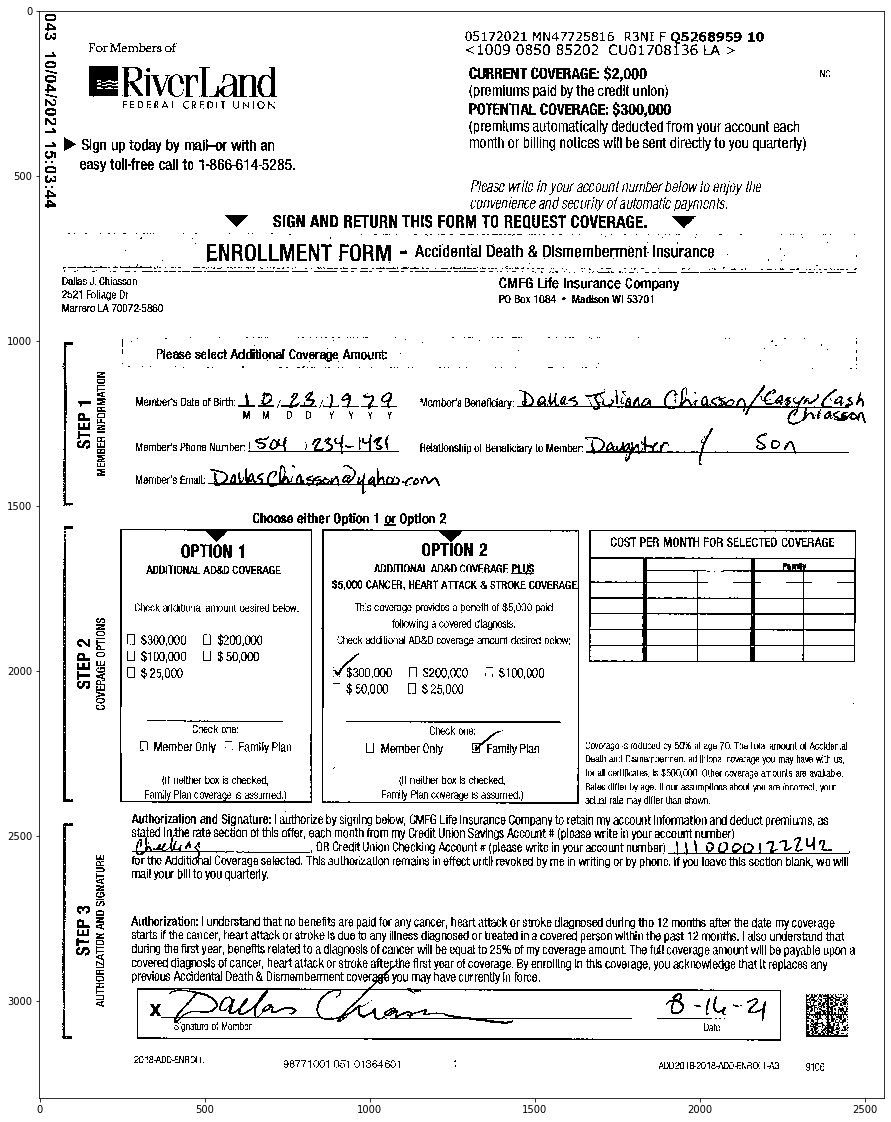

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(image3)
plt.show()

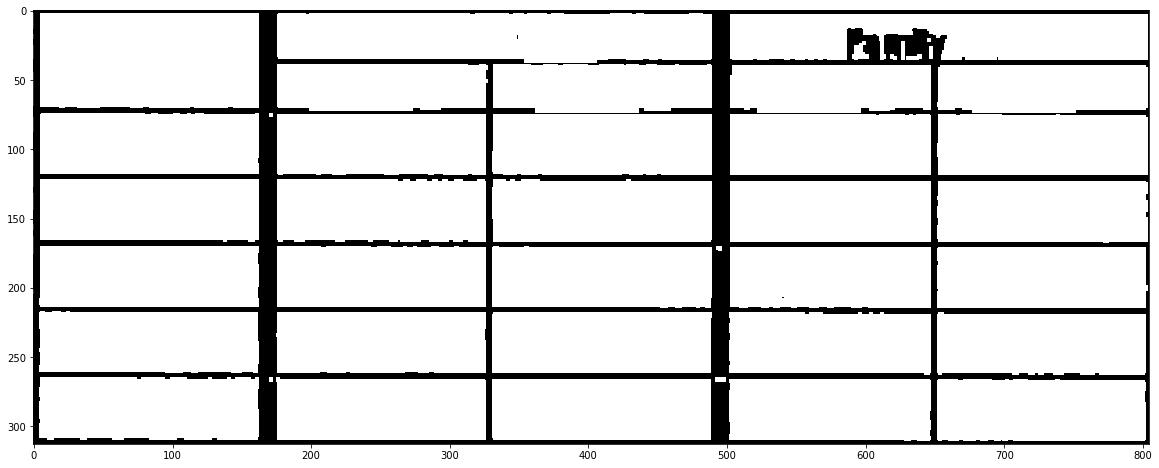

True

In [28]:
#print(dir(table.geometry.boundingBox))
table_bbox= table_bb2.boundingBox
x1 = int(table_bbox.left*w_img)
x2 = int((table_bbox.left+table_bbox.width)*w_img)
y1 = int(table_bbox.top*h_img)
y2 = int((table_bbox.top+table_bbox.height)*h_img)
#cv2.rectangle(image1,(x1,y1),(x2,y2),(255,0,0),5)
crop_img3 = image3[y1:y2, x1:x2]

plt.figure(figsize=(20,20))
plt.imshow(crop_img3)
plt.show()

cv2.imwrite('cropped_Test.jpg',crop_img3)

In [31]:
ls

 Volume in drive C is Windows 
 Volume Serial Number is 5275-53B3

 Directory of C:\Users\mohd166587\Desktop\Detecting_circles-onforms

02/22/2022  04:44 PM    <DIR>          .
02/22/2022  04:44 PM    <DIR>          ..
02/22/2022  02:14 PM    <DIR>          .ipynb_checkpoints
02/11/2022  05:34 PM            83,408 1-52.tif
02/11/2022  05:33 PM            83,362 36-32.tif
02/11/2022  05:32 PM            84,956 53-10.tif
01/05/2022  09:59 PM            29,623 ADD_2012PRO_dob_phoneno_crop.ipynb
02/22/2022  04:44 PM           915,581 cost_per_month_extraction.ipynb
02/22/2022  04:44 PM            50,333 cropped_Test.jpg
02/22/2022  04:44 PM            56,586 cropped_Test2.jpg
02/21/2022  02:31 PM           335,349 Detecting_circles_with_hough_transform.ipynb
10/18/2021  07:10 PM            52,515 NB Apps - 20201012-131053-10.tif
10/18/2021  07:10 PM            52,084 NB Apps - 20210622-121136-32.tif
10/18/2021  07:10 PM            48,869 NB Apps - 20210625-125321-52.tif
01/06/2022  03:42 P

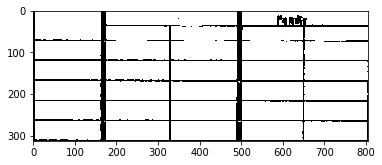

In [38]:
img1 = cv2.imread(r'cropped_Test.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img1)
plt.show()


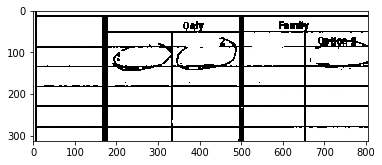

In [39]:
img2 = cv2.imread(r'cropped_Test2.jpg')
plt.figure(figsize=(6,6))
plt.imshow(img2)
plt.show()


In [60]:
img_grey_org1 = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)
thresh_org1 = cv2.threshold(img_grey_org1, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


In [61]:
img_grey_org = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
thresh_org = cv2.threshold(img_grey_org, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]


In [104]:
import numpy as np
kernel = np.ones((5,5), np.uint8)

    # The first parameter is the original image,
    # kernel is the matrix with which image is
    # convolved and third parameter is the number
    # of iterations, which will determine how much
    # you want to erode/dilate a given image.
img_erosion = cv2.dilate(thresh_org1, kernel, iterations=1)
img_erosion2 = cv2.dilate(thresh_org, kernel, iterations=1)

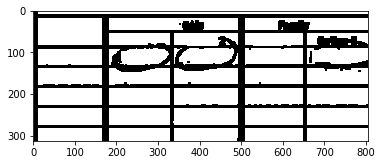

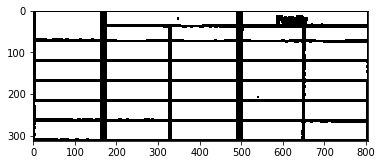

In [105]:
#img_grey_org = cv2.cvtColor(img_erosion , cv2.COLOR_BGR2GRAY)
#thresh_org = cv2.threshold(img_grey_org, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
bitwiseNotorg = cv2.bitwise_not(img_erosion )
bitwiseNot = cv2.bitwise_not(img_erosion2 )
#bitwiseXor = cv2.bitwise_or(bitwiseNotorg  ,bitwiseNot)

plt.imshow(bitwiseNotorg, cmap='gray')
plt.show()
plt.imshow(bitwiseNot, cmap='gray')
plt.show()

In [113]:
bitwiseXor = cv2.bitwise_or(bitwiseNotorg  ,bitwiseNot)

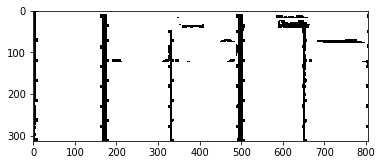

In [114]:
plt.imshow(bitwiseXor, cmap='gray')
plt.show()

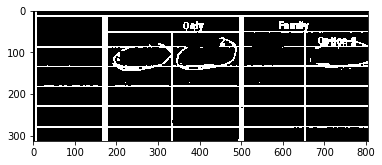

In [67]:
plt.imshow(thresh_org1, cmap='gray')
plt.show()

In [85]:
import cv2
import numpy as np
pre_img = cv2.imread('cropped_Test2.jpg')
#pre_img = cv2.imread('36-32.tif')
#pre_img =cv2.imread('1-52.tif')
print(pre_img.shape) 

inputImageGray = cv2.cvtColor(pre_img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(inputImageGray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
  
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(7, 7))

dilated = cv2.dilate(inputImageGray, kernel)

horizontal = np.copy(bw)
vertical = np.copy(bw)

cols = horizontal.shape[1]

horizontal_size = cols // 30
print(horizontal_size)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (7,1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)



rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 828))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)
# Show extracted vertical lines

vertical = cv2.bitwise_not(horizontal)
# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)
# show_wait_destroy("edges", edges)
# # Step 2
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel)
# show_wait_destroy("dilate", edges)
# # Step 3
smooth = np.copy(vertical)
# # Step 4
# smooth = cv.blur(smooth, (2, 2))
# # Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# # Show final result


# cv2.imshow('input', bw)
# cv2.imshow('output', vertical)
# # plt.imshow(inputImageGray)

# # plt.show()
# # plt.imshow(dilated)
# # plt.show()
# cv2.waitKey(0)

(313, 805, 3)
26


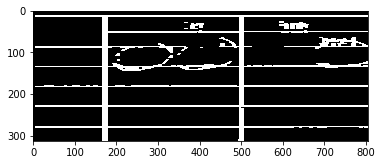

In [110]:
plt.imshow(horizontal, cmap='gray' )
plt.show()